<a href="https://colab.research.google.com/github/Tripyromaniac/CS114.L22.KHCL/blob/main/Running_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Trích xuất dữ liệu từ file text

In [9]:
train = []
test = []

with open('train.txt') as my_file:
    for line in my_file:
        train.append(line)

with open('test.txt') as my_file1:
    for line1 in my_file1:
        test.append(line1)

def converse_to_float(array):
  for i in range(len(array)):
     array[i] = array[i].replace('\n', '')
     temp = array[i].split(",")
     temp[0] = float(temp[0])
     temp[1] = float(temp[1])
     array[i] = temp
  return array

train = np.array(converse_to_float(train))
test = np.array(converse_to_float(test))

x_train = train[:,0]
y_train = train[:,1]
x_test = test[:,0]
y_test = test[:,1]

x_train = np.reshape(x_train, (len(x_train),1))
y_train = np.reshape(y_train, (len(y_train),1))
x_test = np.reshape(x_test, (len(x_test),1))
y_test = np.reshape(y_test, (len(y_test),1))


Trực quan hóa 2 bộ dữ liệu bằng biểu đồ

Text(0.5, 1.0, 'Dữ liệu test')

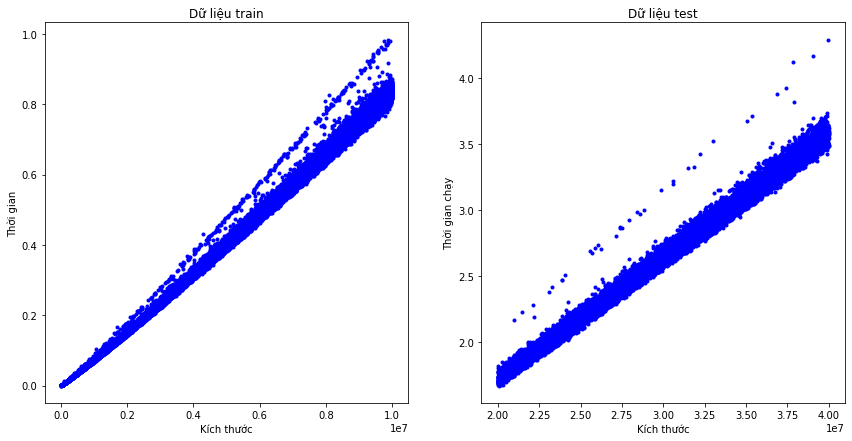

In [10]:
plt.figure(figsize=(30, 7))

# train
plt.subplot(1, 4, 1)
plt.plot(x_train, y_train, 'b.')
plt.xlabel('Kích thước')
plt.ylabel('Thời gian')
plt.title('Dữ liệu train')

# test
plt.subplot(1, 4, 2)
plt.plot(x_test, y_test, 'b.')
plt.xlabel('Kích thước')
plt.ylabel('Thời gian chạy')
plt.title('Dữ liệu test')


#Dự đoán và vẽ biểu đồ

Trước khi scale

Training dataset: 
Score: 0.9975924993345859
MSE:0.00014337728721748835

Testing dataset: 
Score: 0.9284132208349453
MSE: 0.020664949397549082


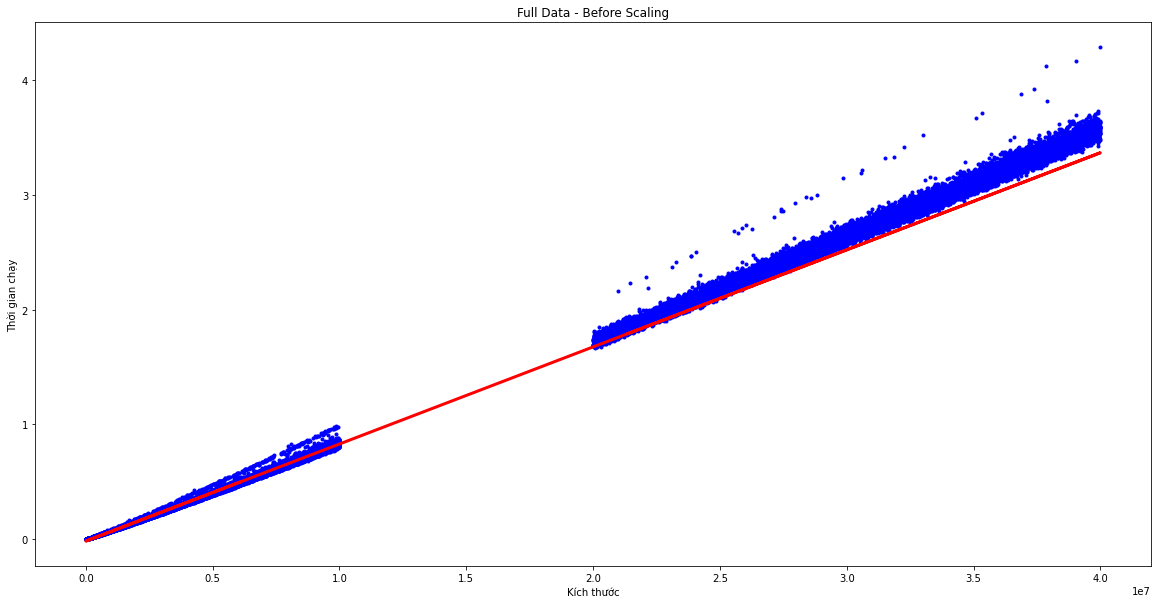

In [11]:
lr = LinearRegression().fit(x_train,y_train)

pre1 = lr.predict(x_train)
pre2 = lr.predict(x_test)

print('Training dataset: ')
print("Score:",lr.score(x_train, y_train))
print('MSE:', end = '')
print(mean_squared_error(y_train, pre1))
print('')
print('Testing dataset: ')
print("Score:",lr.score(x_test, y_test))
print('MSE: ', end = '')
print(mean_squared_error(y_test, pre2))

x_full = np.concatenate((x_train, x_test))
y_full = np.concatenate((y_train, y_test))
y_pre_full = np.concatenate((pre1, pre2))

def showResult(x, y, y_pre, title):
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    ax.plot(x, y, ".", color='blue')
    ax.plot(x, y_pre, color='red', linewidth=3)
    ax.set_title(title)
    ax.set(xlabel='Kích thước', ylabel='Thời gian chạy')
    plt.show()

showResult(x_full, y_full, y_pre_full, 'Full Data - Before Scaling')

Sau khi scale


Dữ liệu đầu vào mới sau khi scale là ma trận với các cột:
  - *X1* = x
  - *X2* = x^2
  - *X3* = x.log(x)
  - *X4* = log(x)

In [12]:
mtr = []
mtr2 = []

mtr = np.append(mtr, x_train)
mtr = np.reshape(mtr, (len(x_train),1))
mtr = np.append(mtr, x_train**2, axis=1)
mtr = np.append(mtr, x_train*np.log(x_train), axis=1)
mtr = np.append(mtr, np.log(x_train), axis=1)

mtr2 = np.append(mtr2, x_test)
mtr2 = np.reshape(mtr2, (len(x_test),1))
mtr2 = np.append(mtr2, x_test**2, axis=1)
mtr2 = np.append(mtr2, x_test*np.log(x_test), axis=1)
mtr2 = np.append(mtr2, np.log(x_test), axis=1)

print(mtr)
print()
print(mtr2)

[[6.08369500e+06 3.70113449e+13 9.50341467e+07 1.56211228e+01]
 [1.95436700e+06 3.81955037e+12 2.83101335e+07 1.44855769e+01]
 [3.73418500e+06 1.39441376e+13 5.65095715e+07 1.51330401e+01]
 ...
 [9.83736400e+06 9.67737305e+13 1.58398268e+08 1.61016983e+01]
 [9.46659300e+06 8.96163830e+13 1.52064531e+08 1.60632796e+01]
 [4.08080100e+06 1.66529368e+13 6.21171524e+07 1.52218039e+01]]

[[3.78376120e+07 1.43168488e+15 6.60221461e+08 1.74488142e+01]
 [3.73952460e+07 1.39840442e+15 6.52062929e+08 1.74370541e+01]
 [3.66108270e+07 1.34035265e+15 6.37608839e+08 1.74158546e+01]
 ...
 [3.35203230e+07 1.12361205e+15 5.80828843e+08 1.73276625e+01]
 [2.12432640e+07 4.51276265e+14 3.58406800e+08 1.68715504e+01]
 [2.13804840e+07 4.57125096e+14 3.60859576e+08 1.68779891e+01]]


Text(0.5, 1.0, 'Dữ liệu test')

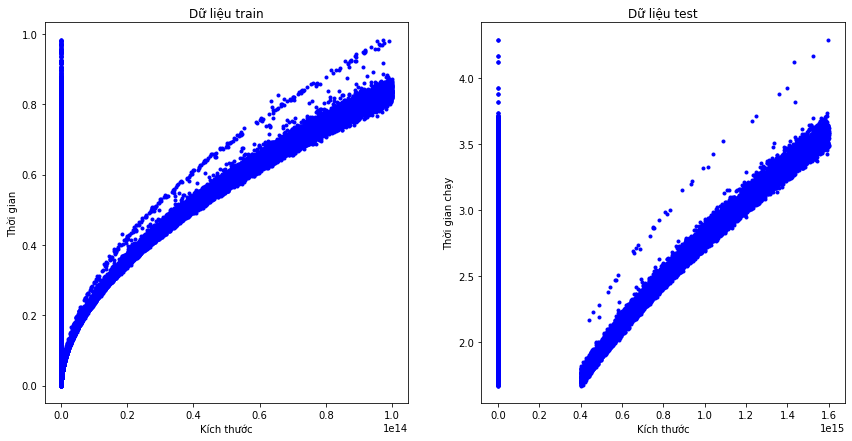

In [13]:
plt.figure(figsize=(30, 7))

# train
plt.subplot(1, 4, 1)
plt.plot(mtr, y_train, 'b.')
plt.xlabel('Kích thước')
plt.ylabel('Thời gian')
plt.title('Dữ liệu train')

# test
plt.subplot(1, 4, 2)
plt.plot(mtr2, y_test, 'b.')
plt.xlabel('Kích thước')
plt.ylabel('Thời gian chạy')
plt.title('Dữ liệu test')

Training dataset: 
Score: 0.9979530945606727
MSE:0.00012190225045315813

Testing dataset: 
Score: 0.9855156510973345
MSE: 0.004181195754594608


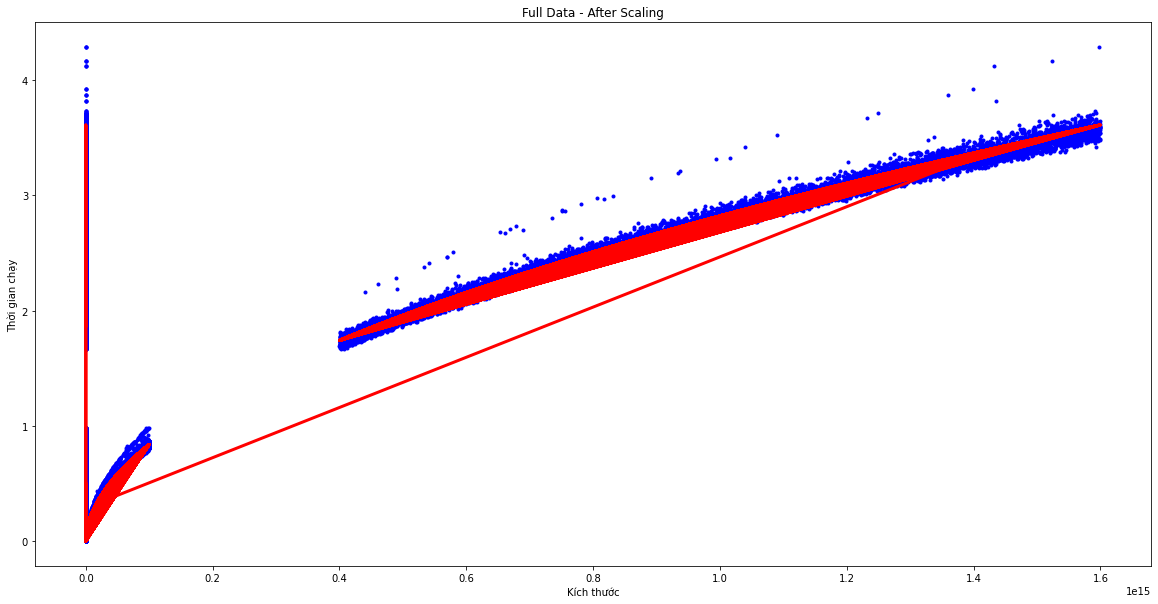

In [14]:
lr = LinearRegression().fit(mtr,y_train)

pre1 = lr.predict(mtr)
pre2 = lr.predict(mtr2)

print('Training dataset: ')
print("Score:",lr.score(mtr, y_train))
print('MSE:', end = '')
print(mean_squared_error(y_train, pre1))
print('')
print('Testing dataset: ')
print("Score:",lr.score(mtr2, y_test))
print('MSE: ', end = '')
print(mean_squared_error(y_test, pre2))

x_full = np.concatenate((mtr, mtr2))
y_full = np.concatenate((y_train, y_test))
y_pre_full = np.concatenate((pre1, pre2))

showResult(x_full, y_full, y_pre_full, 'Full Data - After Scaling')